In [20]:
import pandas as pd
import torch
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

In [21]:
exp_dir = Path("../../results/shift_color/dipdi")

df_dipdi_color = pd.read_csv(exp_dir / "dipdi_RGB_shift_color.csv")
df_dipdi_gray = pd.read_csv(exp_dir / "dipdi_Grayscale_shift_color.csv")

df_dipdi_color["target"] = "RGB"
df_dipdi_gray["target"] = "Grayscale"

df_dipdi = pd.concat([df_dipdi_color, df_dipdi_gray]).reset_index(drop=True)

out_dir = Path("../../results/shift_color/plots")
out_dir.mkdir(exist_ok=True, parents=True)

In [22]:
n_folds = 1
n_runs = 10
models_A = [1, 2]
models_B = [3, 4]

folds = []
runs = []
accs = []
acc_diffs = []
groups = []

for fold in range(1, n_folds+1):
    for run in range(1, n_runs+1):

        df_models_A1 = pd.read_csv(exp_dir / f"RGB/100-0/model_1/fold_{fold}/run_{run}/predictions/predictions.csv")
        df_models_A2 = pd.read_csv(exp_dir / f"RGB/100-0/model_2/fold_{fold}/run_{run}/predictions/predictions.csv")
        df_models_B1 = pd.read_csv(exp_dir / f"RGB/0-100/model_1/fold_{fold}/run_{run}/predictions/predictions.csv")
        df_models_B2 = pd.read_csv(exp_dir / f"RGB/0-100/model_2/fold_{fold}/run_{run}/predictions/predictions.csv")
        
        y_correct_A1_m = (df_models_A1["y"][df_models_A1["a"] == 0] == df_models_A1["y_pred"][df_models_A1["a"] == 0]).astype(int) 
        y_correct_A2_m = (df_models_A2["y"][df_models_A2["a"] == 0] == df_models_A2["y_pred"][df_models_A2["a"] == 0]).astype(int)
        y_correct_B1_m = (df_models_B1["y"][df_models_B1["a"] == 0] == df_models_B1["y_pred"][df_models_B1["a"] == 0]).astype(int)
        y_correct_B2_m = (df_models_B2["y"][df_models_B2["a"] == 0] == df_models_B2["y_pred"][df_models_B2["a"] == 0]).astype(int)

        y_correct_A1_f = (df_models_A1["y"][df_models_A1["a"] == 1] == df_models_A1["y_pred"][df_models_A1["a"] == 1]).astype(int)
        y_correct_A2_f = (df_models_A2["y"][df_models_A2["a"] == 1] == df_models_A2["y_pred"][df_models_A2["a"] == 1]).astype(int)
        y_correct_B1_f = (df_models_B1["y"][df_models_B1["a"] == 1] == df_models_B1["y_pred"][df_models_B1["a"] == 1]).astype(int)
        y_correct_B2_f = (df_models_B2["y"][df_models_B2["a"] == 1] == df_models_B2["y_pred"][df_models_B2["a"] == 1]).astype(int)

        acc_A1_m = np.mean(y_correct_A1_m)
        acc_A2_m = np.mean(y_correct_A2_m)
        acc_B1_m = np.mean(y_correct_B1_m)
        acc_B2_m = np.mean(y_correct_B2_m)
        
        acc_A1_f = np.mean(y_correct_A1_f)
        acc_A2_f = np.mean(y_correct_A2_f)
        acc_B1_f = np.mean(y_correct_B1_f)
        acc_B2_f = np.mean(y_correct_B2_f)

        acc_A_m = np.mean([acc_A1_m, acc_A2_m])
        acc_B_m = np.mean([acc_B1_m, acc_B2_m])

        acc_A_f = np.mean([acc_A1_f, acc_A2_f])
        acc_B_f = np.mean([acc_B1_f, acc_B2_f])

        acc_diff_m = np.abs(acc_A_m - acc_B_m)
        acc_diff_f = np.abs(acc_A_f - acc_B_f)

        acc_mean_m = np.mean([acc_A_m, acc_B_m])
        acc_mean_f = np.mean([acc_A_f, acc_B_f])

        folds.append(fold)
        runs.append(run)
        accs.append(acc_mean_m)
        acc_diffs.append(acc_diff_m)
        groups.append(0)

        folds.append(fold)
        runs.append(run)
        accs.append(acc_mean_f)
        acc_diffs.append(acc_diff_f)
        groups.append(1)

df_test_color = pd.DataFrame({"fold": folds, "run": runs, "acc": accs, "acc_diff": acc_diffs, "a": groups})

folds = []
runs = []
accs = []
acc_diffs = []
groups = []

for fold in range(1, n_folds+1):
    for run in range(1, n_runs+1):

        df_models_A1 = pd.read_csv(exp_dir / f"Grayscale/100-0/model_1/fold_{fold}/run_{run}/predictions/predictions.csv")
        df_models_A2 = pd.read_csv(exp_dir / f"Grayscale/100-0/model_2/fold_{fold}/run_{run}/predictions/predictions.csv")
        df_models_B1 = pd.read_csv(exp_dir / f"Grayscale/0-100/model_1/fold_{fold}/run_{run}/predictions/predictions.csv")
        df_models_B2 = pd.read_csv(exp_dir / f"Grayscale/0-100/model_2/fold_{fold}/run_{run}/predictions/predictions.csv")
        
        y_correct_A1_m = (df_models_A1["y"][df_models_A1["a"] == 0] == df_models_A1["y_pred"][df_models_A1["a"] == 0]).astype(int) 
        y_correct_A2_m = (df_models_A2["y"][df_models_A2["a"] == 0] == df_models_A2["y_pred"][df_models_A2["a"] == 0]).astype(int)
        y_correct_B1_m = (df_models_B1["y"][df_models_B1["a"] == 0] == df_models_B1["y_pred"][df_models_B1["a"] == 0]).astype(int)
        y_correct_B2_m = (df_models_B2["y"][df_models_B2["a"] == 0] == df_models_B2["y_pred"][df_models_B2["a"] == 0]).astype(int)

        y_correct_A1_f = (df_models_A1["y"][df_models_A1["a"] == 1] == df_models_A1["y_pred"][df_models_A1["a"] == 1]).astype(int)
        y_correct_A2_f = (df_models_A2["y"][df_models_A2["a"] == 1] == df_models_A2["y_pred"][df_models_A2["a"] == 1]).astype(int)
        y_correct_B1_f = (df_models_B1["y"][df_models_B1["a"] == 1] == df_models_B1["y_pred"][df_models_B1["a"] == 1]).astype(int)
        y_correct_B2_f = (df_models_B2["y"][df_models_B2["a"] == 1] == df_models_B2["y_pred"][df_models_B2["a"] == 1]).astype(int)

        acc_A1_m = np.mean(y_correct_A1_m)
        acc_A2_m = np.mean(y_correct_A2_m)
        acc_B1_m = np.mean(y_correct_B1_m)
        acc_B2_m = np.mean(y_correct_B2_m)
        
        acc_A1_f = np.mean(y_correct_A1_f)
        acc_A2_f = np.mean(y_correct_A2_f)
        acc_B1_f = np.mean(y_correct_B1_f)
        acc_B2_f = np.mean(y_correct_B2_f)

        acc_A_m = np.mean([acc_A1_m, acc_A2_m])
        acc_B_m = np.mean([acc_B1_m, acc_B2_m])

        acc_A_f = np.mean([acc_A1_f, acc_A2_f])
        acc_B_f = np.mean([acc_B1_f, acc_B2_f])

        acc_diff_m = np.abs(acc_A_m - acc_B_m)
        acc_diff_f = np.abs(acc_A_f - acc_B_f)

        acc_mean_m = np.mean([acc_A_m, acc_B_m])
        acc_mean_f = np.mean([acc_A_f, acc_B_f])

        folds.append(fold)
        runs.append(run)
        accs.append(acc_mean_m)
        acc_diffs.append(acc_diff_m)
        groups.append(0)

        folds.append(fold)
        runs.append(run)
        accs.append(acc_mean_f)
        acc_diffs.append(acc_diff_f)
        groups.append(1)

df_test_gray = pd.DataFrame({"fold": folds, "run": runs, "acc": accs, "acc_diff": acc_diffs, "a": groups})

In [23]:
df_test_color["target"] = "RGB"
df_test_gray["target"] = "Grayscale"

df_test = pd.concat([df_test_color, df_test_gray]).reset_index(drop=True)
df_test["a"] = df_test["a"].map({0: "Male", 1: "Female"})

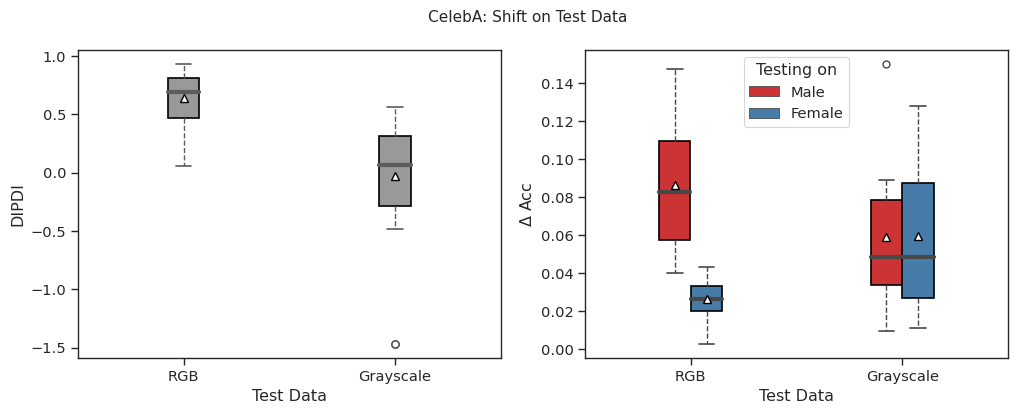

In [24]:
sns.set_theme(style="ticks")
sns.set_context("paper", font_scale=1.2)
palette_name = "Set1"
colors = sns.color_palette(palette_name)

flierprops = dict(marker="o", markerfacecolor="white")
meanprops = dict(markerfacecolor="white", markeredgecolor="black")
medianprops = dict(linewidth=3)
boxprops = dict(edgecolor="black")
whiskerprops = dict(linestyle="--", linewidth=1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_params = {"showmeans": True, "width": 0.15, "flierprops": flierprops, "whiskerprops": whiskerprops, "boxprops": boxprops, "meanprops": meanprops, "medianprops": medianprops}
sns.boxplot(x="target", y="dipdi", data=df_dipdi, order=["RGB", "Grayscale"], ax=ax1, zorder=1, color=colors[-1], **plot_params)
plot_params = {"showmeans": True, "width": 0.3, "flierprops": flierprops, "whiskerprops": whiskerprops, "boxprops": boxprops, "meanprops": meanprops, "medianprops": medianprops}
sns.boxplot(x="target", y="acc_diff", hue="a", data=df_test, order=["RGB", "Grayscale"], ax=ax2, palette="Set1", **plot_params)

# ax2.set_ylim(0, 0.25)
ax1.set_ylabel("DIPDI")
ax2.set_ylabel(r"$\Delta$ Acc")

ax1.set_xlabel("Test Data")
ax2.set_xlabel("Test Data")

ax1.set_xticklabels(["RGB", "Grayscale"])
ax2.set_xticklabels(["RGB", "Grayscale"])

ax2.legend(title="Testing on", loc="upper center")
plt.suptitle("CelebA: Shift on Test Data", fontsize=11)

plt.savefig(out_dir / "dipdi_shift_color.png", dpi=300, bbox_inches="tight")